In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
warnings.filterwarnings('ignore')

In [2]:
def percentage(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 14)
        
def percentage_hue(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 14)
    
def test_model(y_test,y_pred):
    print(classification_report(y_test,y_pred))
    print()
    print("Accuracy score: ",accuracy_score(y_test,y_pred))
    print("Precision score: ", precision_score(y_test,y_pred))
    
def train_model(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred,zero_division=0)
    
    return accuracy,precision

In [3]:
sns.set_theme(rc={'figure.figsize':(10,8)}, palette = "tab10")

In [4]:
df = pd.read_csv("Employee.csv")

In [5]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [6]:
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [7]:
df.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

In [8]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [10]:
df.nunique()

Education                     3
JoiningYear                   7
City                          3
PaymentTier                   3
Age                          20
Gender                        2
EverBenched                   2
ExperienceInCurrentDomain     8
LeaveOrNot                    2
dtype: int64

In [11]:
df.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [12]:
df.shape

(4653, 9)

In [13]:
duplicates = df.duplicated().sum()
print('No. of duplicate records :',duplicates)

# df = df.drop_duplicates()
# print('Shape after dropping duplicate records :',df.shape)

No. of duplicate records : 1889


In [14]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


# Categorical Features

### Education

In [15]:
df["Education"].value_counts()

Bachelors    3601
Masters       873
PHD           179
Name: Education, dtype: int64

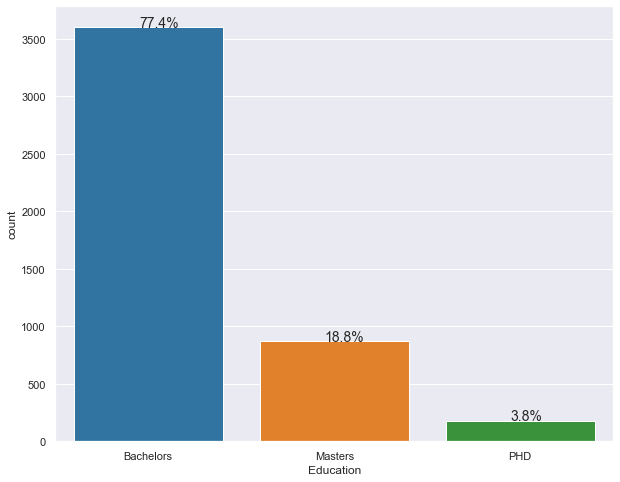

In [16]:
ax = sns.countplot(x = 'Education',data = df)
percentage(ax, df.Education)

### City

In [17]:
df['City'].value_counts()

Bangalore    2228
Pune         1268
New Delhi    1157
Name: City, dtype: int64

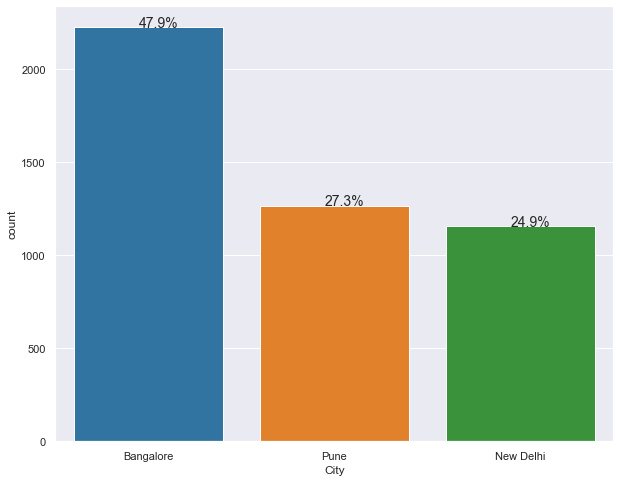

In [18]:
ax = sns.countplot(x = 'City',data = df)
percentage(ax, df.City)

### Gender

In [19]:
df['Gender'].value_counts()

Male      2778
Female    1875
Name: Gender, dtype: int64

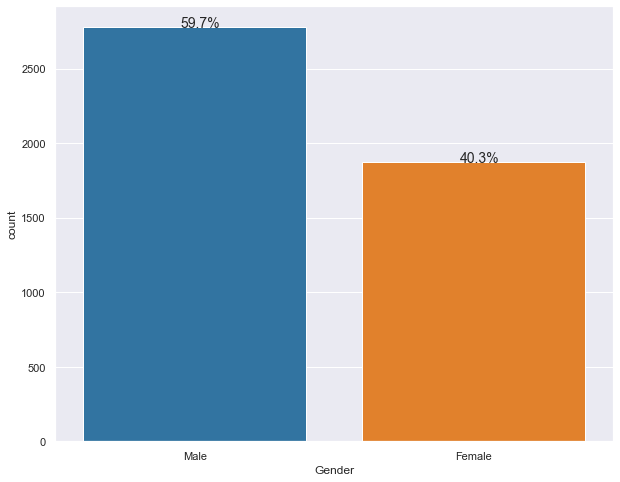

In [20]:
ax = sns.countplot(x = 'Gender',data = df)
percentage(ax, df.Gender)

### EverBenched

In [21]:
df['EverBenched'].value_counts()

No     4175
Yes     478
Name: EverBenched, dtype: int64

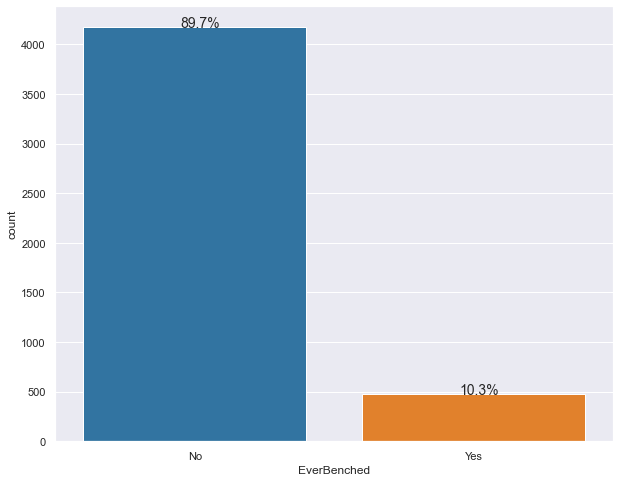

In [22]:
ax = sns.countplot(x = 'EverBenched',data = df)
percentage(ax, df.EverBenched)

# Numerical Features

### JoiningYear

In [23]:
df['JoiningYear'].value_counts()

2017    1108
2015     781
2014     699
2013     669
2016     525
2012     504
2018     367
Name: JoiningYear, dtype: int64

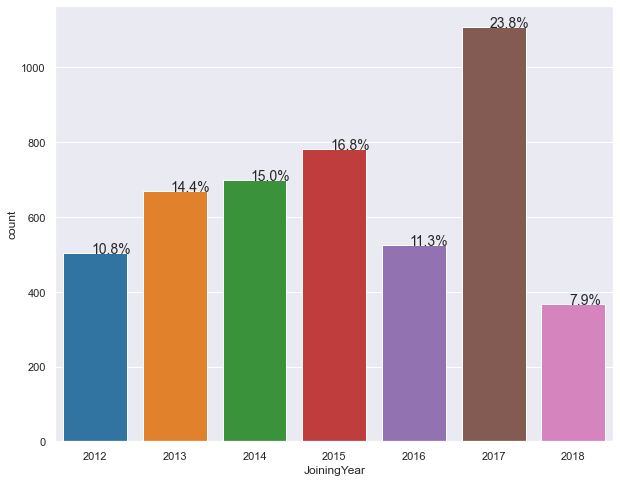

In [24]:
ax = sns.countplot(x = 'JoiningYear',data = df)
percentage(ax, df.JoiningYear)

### PaymentTier

In [25]:
df['PaymentTier'][df['PaymentTier']==3]=0
df['PaymentTier'][df['PaymentTier']==1]=3
df['PaymentTier'][df['PaymentTier']==2]=1
df['PaymentTier'][df['PaymentTier']==3]=2

In [26]:
df['PaymentTier'].value_counts()

0    3492
1     918
2     243
Name: PaymentTier, dtype: int64

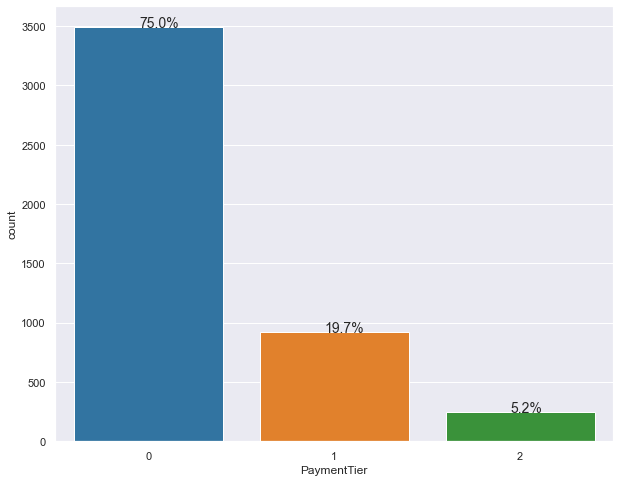

In [27]:
ax = sns.countplot(x = 'PaymentTier', data = df)
percentage(ax, df.PaymentTier)

### Age

In [28]:
df['Age'].value_counts()

26    645
28    630
27    625
25    418
24    385
29    230
30    220
37    141
36    139
34    136
38    136
40    134
32    132
39    131
31    125
33    124
35    123
41     82
22     49
23     48
Name: Age, dtype: int64

Age Mean: 29


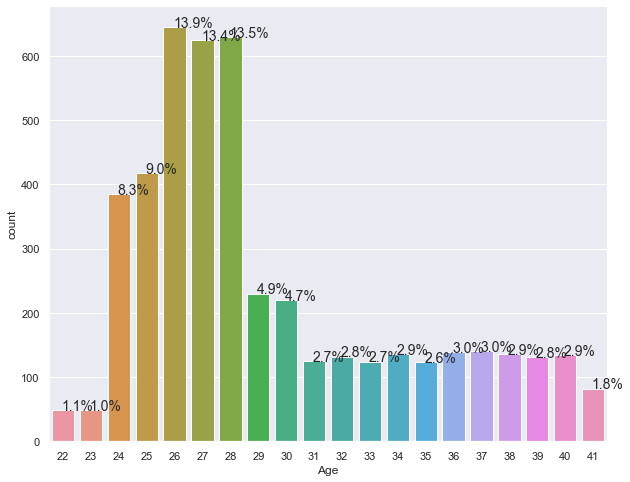

In [29]:
ax = sns.countplot(x = 'Age', data = df)
percentage(ax, df.Age)
print('Age Mean:',int(df.Age.mean()))

### ExperienceInCurrentDomain

In [30]:
df['ExperienceInCurrentDomain'].value_counts()

2    1087
4     931
5     919
3     786
1     558
0     355
7       9
6       8
Name: ExperienceInCurrentDomain, dtype: int64

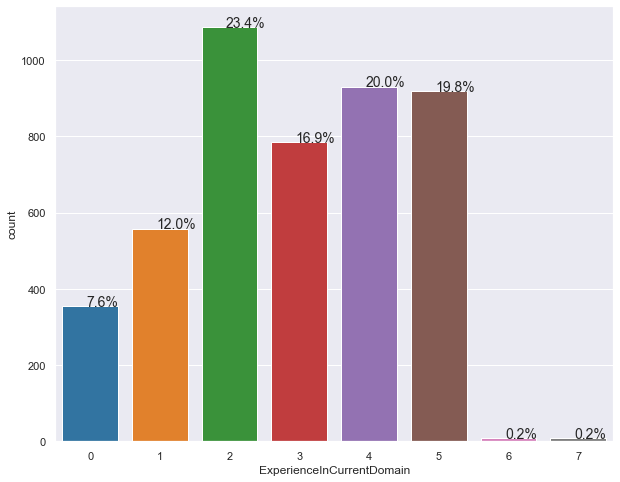

In [31]:
ax = sns.countplot(x = 'ExperienceInCurrentDomain', data = df)
percentage(ax, df.ExperienceInCurrentDomain)

### LeaveOrNot

In [32]:
df['LeaveOrNot'].value_counts()

0    3053
1    1600
Name: LeaveOrNot, dtype: int64

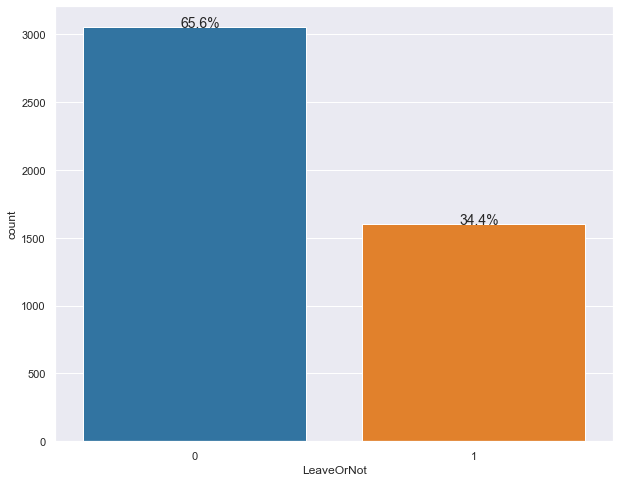

In [33]:
ax = sns.countplot(x = 'LeaveOrNot', data = df)
percentage(ax, df.LeaveOrNot)

# Bivariate Analysis - Categorical Features

### Education Vs LeaveOrNot

In [34]:
pd.crosstab(df['Education'],df['LeaveOrNot'],margins=True).style.background_gradient()

LeaveOrNot,0,1,All
Education,,,
Bachelors,2472,1129,3601
Masters,447,426,873
PHD,134,45,179
All,3053,1600,4653


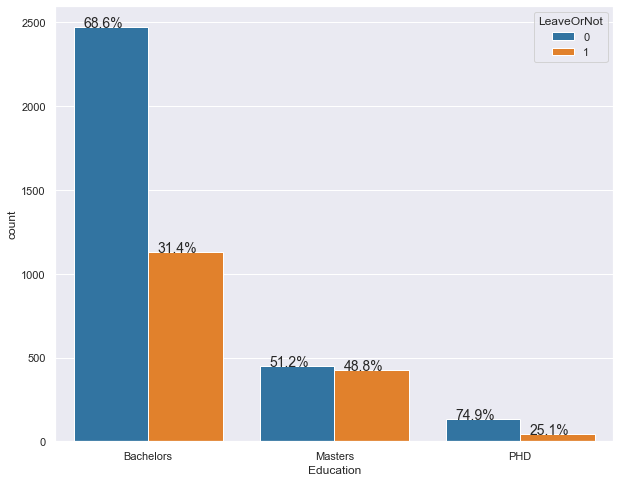

In [35]:
ax = sns.countplot(data = df ,x='Education',hue='LeaveOrNot')
percentage_hue(ax, df.Education, 3,2)

### City Vs LeaveOrNot

In [36]:
pd.crosstab(df['City'],df['LeaveOrNot'],margins=True).style.background_gradient()

LeaveOrNot,0,1,All
City,,,
Bangalore,1633,595,2228
New Delhi,791,366,1157
Pune,629,639,1268
All,3053,1600,4653


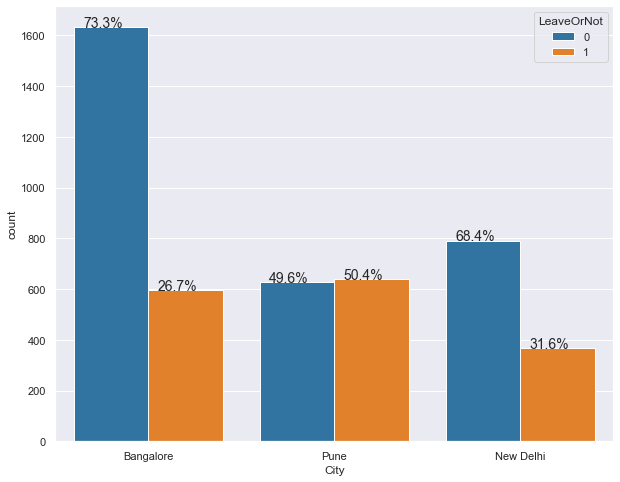

In [37]:
ax = sns.countplot(data = df ,x='City',hue='LeaveOrNot')
percentage_hue(ax, df.City, 3,2)

### Gender Vs LeaveOrNot

In [38]:
pd.crosstab(df['Gender'],df['LeaveOrNot'],margins=True).style.background_gradient()

LeaveOrNot,0,1,All
Gender,,,
Female,991,884,1875
Male,2062,716,2778
All,3053,1600,4653


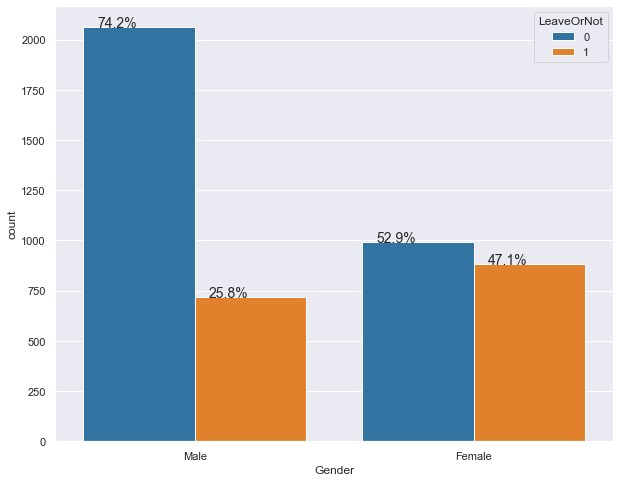

In [39]:
ax = sns.countplot(data = df ,x='Gender',hue='LeaveOrNot')
percentage_hue(ax, df.Gender, 2,2)

### EverBenched Vs LeaveOrNot

In [40]:
pd.crosstab(df['EverBenched'],df['LeaveOrNot'],margins=True).style.background_gradient()

LeaveOrNot,0,1,All
EverBenched,,,
No,2792,1383,4175
Yes,261,217,478
All,3053,1600,4653


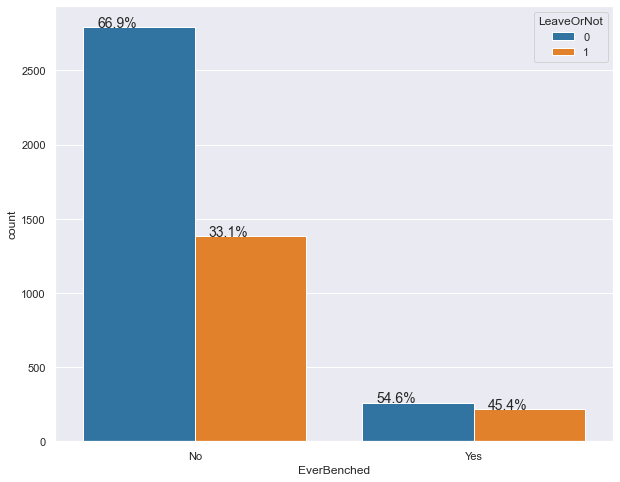

In [41]:
ax = sns.countplot(data = df ,x='EverBenched',hue='LeaveOrNot')
percentage_hue(ax, df.EverBenched, 2,2)

# Bivariate Analysis - Numerical Features

### JoiningYear Vs LeaveOrNot

In [42]:
pd.crosstab(df['JoiningYear'],df['LeaveOrNot'],margins=True).style.background_gradient()

LeaveOrNot,0,1,All
JoiningYear,,,
2012,395,109,504
2013,445,224,669
2014,526,173,699
2015,463,318,781
2016,408,117,525
2017,811,297,1108
2018,5,362,367
All,3053,1600,4653


<AxesSubplot:xlabel='JoiningYear', ylabel='count'>

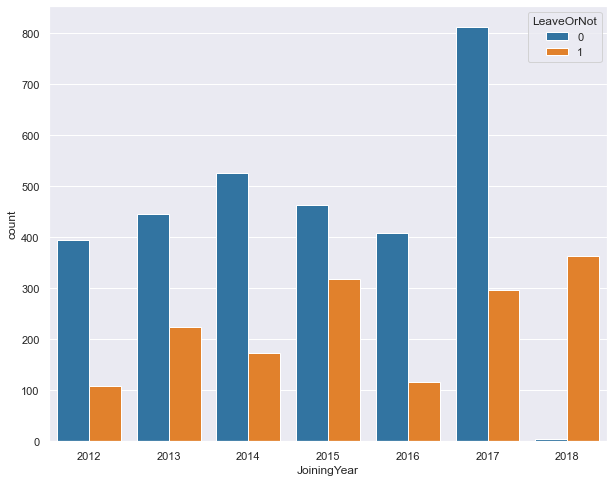

In [43]:
sns.countplot(data = df ,x='JoiningYear',hue='LeaveOrNot')

### PaymentTier Vs LeaveOrNot

In [44]:
pd.crosstab(df['PaymentTier'],df['LeaveOrNot'],margins=True).style.background_gradient()

LeaveOrNot,0,1,All
PaymentTier,,,
0,2531,961,3492
1,368,550,918
2,154,89,243
All,3053,1600,4653


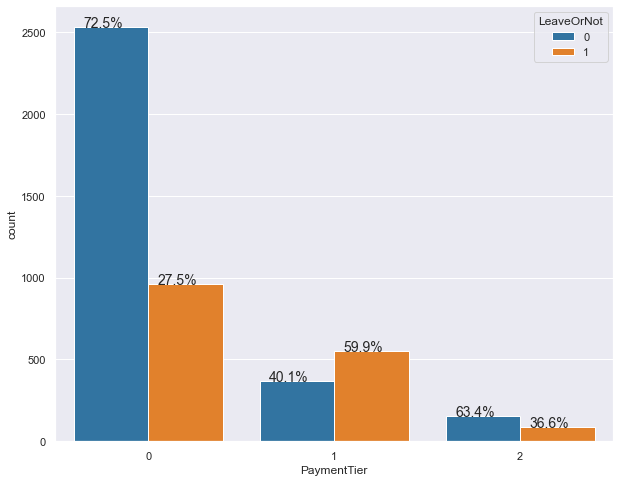

In [45]:
ax = sns.countplot(data = df ,x='PaymentTier',hue='LeaveOrNot')
percentage_hue(ax, df.PaymentTier, 3,2)

### Age Vs LeaveOrNot

In [46]:
pd.crosstab(df['Age'],df['LeaveOrNot'],margins=True).style.background_gradient()

LeaveOrNot,0,1,All
Age,,,
22,30,19,49
23,32,16,48
24,232,153,385
25,242,176,418
26,422,223,645
27,399,226,625
28,444,186,630
29,155,75,230
30,143,77,220


<AxesSubplot:xlabel='Age', ylabel='count'>

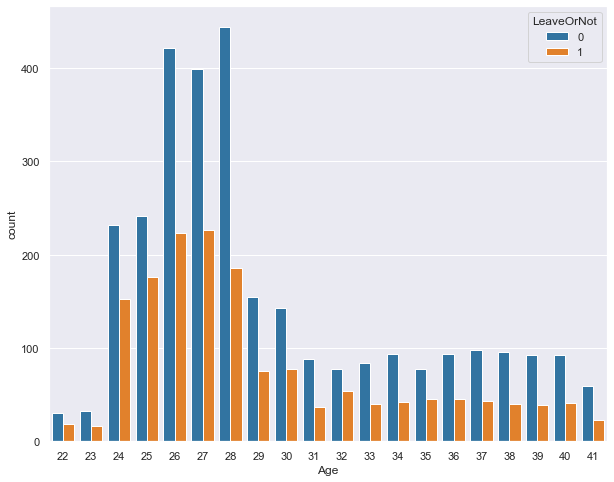

In [47]:
sns.countplot(data = df ,x='Age',hue='LeaveOrNot')

### ExperienceInCurrentDomain Vs LeaveOrNot

In [48]:
pd.crosstab(df['ExperienceInCurrentDomain'],df['LeaveOrNot'],margins=True).style.background_gradient()

LeaveOrNot,0,1,All
ExperienceInCurrentDomain,,,
0,231,124,355
1,370,188,558
2,688,399,1087
3,487,299,786
4,634,297,931
5,631,288,919
6,6,2,8
7,6,3,9
All,3053,1600,4653


<AxesSubplot:xlabel='ExperienceInCurrentDomain', ylabel='count'>

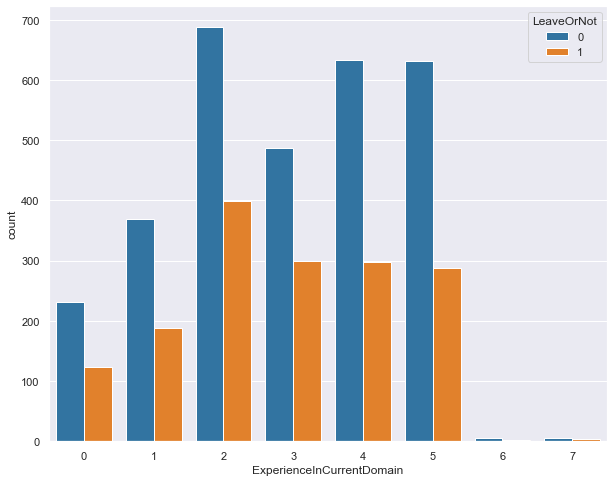

In [49]:
sns.countplot(data = df ,x='ExperienceInCurrentDomain',hue='LeaveOrNot')

## Correlation

In [50]:
df.corr()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
JoiningYear,1.000000,0.096078,0.013165,-0.036525,0.181705
PaymentTier,0.096078,1.000000,-0.007631,-0.018314,0.197638
Age,0.013165,-0.007631,1.000000,-0.134643,-0.051126
ExperienceInCurrentDomain,-0.036525,-0.018314,-0.134643,1.000000,-0.030504
LeaveOrNot,0.181705,0.197638,-0.051126,-0.030504,1.000000


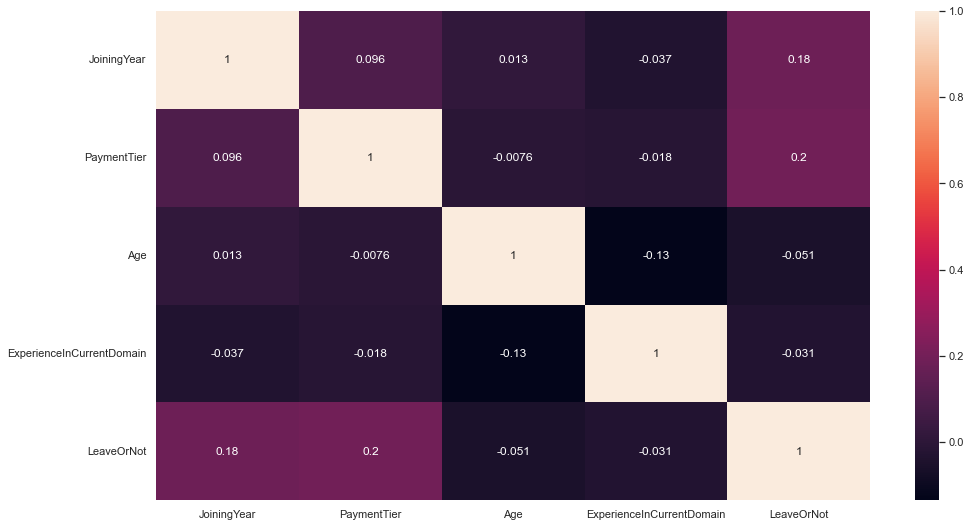

In [51]:
plt.figure(figsize=(16,9))
ax = sns.heatmap(df.corr(),annot = True)
plt.show()

# Catergorical Feature Encoding

In [52]:
df=pd.get_dummies(data=df,columns=['City', 'Gender','EverBenched'], drop_first=True)
df['Education'] = pd.factorize(df["Education"])[0] # changed categorical to numbers
# df['City'] = pd.factorize(df["City"])[0]
# df['Senority'] = df[['ExperienceInCurrentDomain','Age']].apply(lambda x: 1 if x.ExperienceInCurrentDomain >= 3 else 0, axis=1).astype(np.uint8) # 0 : junior , 1: senior
# df['isRecentEmployee'] = np.select([df['JoiningYear'] < 2017, df['JoiningYear'] >= 2017], [0, 1])
df

,Education,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,City_New Delhi,City_Pune,Gender_Male,EverBenched_Yes
0,0,2017,0,34,0,0,0,0,1,0
1,0,2013,2,28,3,1,0,1,0,0
2,0,2014,0,38,2,0,1,0,0,0
3,1,2016,0,27,5,1,0,0,1,0
4,1,2017,0,24,2,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
4648,0,2013,0,26,4,0,0,0,0,0
4649,1,2013,1,37,2,1,0,1,1,0
4650,1,2018,0,27,5,1,1,0,1,0
4651,0,2012,0,30,2,0,0,0,1,1


## Feature Scaling

In [53]:
scaler = StandardScaler()
scaler.fit(df.drop('LeaveOrNot',axis = 1))

StandardScaler()

In [54]:
scaled_features = scaler.transform(df.drop('LeaveOrNot',axis = 1))
df_feat = pd.DataFrame(scaled_features,columns = ['Education', 'JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain',
        'City_New Delhi', 'City_Pune', 'Gender_Male', 'EverBenched_Yes'])
df_feat.head()

,Education,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,City_New Delhi,City_Pune,Gender_Male,EverBenched_Yes
0,-0.507731,1.039638,-0.537503,0.954645,-1.864901,-0.575282,-0.612041,0.821551,-0.338365
1,-0.507731,-1.107233,3.025177,-0.288732,0.060554,-0.575282,1.633878,-1.217210,-0.338365
2,-0.507731,-0.570515,-0.537503,1.783563,-0.581264,1.738277,-0.612041,-1.217210,-0.338365
3,1.411418,0.502921,-0.537503,-0.495961,1.344191,-0.575282,-0.612041,0.821551,-0.338365
4,1.411418,1.039638,-0.537503,-1.117650,-0.581264,-0.575282,1.633878,0.821551,2.955387


## Feature Selection and Data Splitting

In [55]:
X = df_feat
y = df['LeaveOrNot']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## Prediction of Employee LeavingOrNot using KNN

In [56]:
knn = KNeighborsClassifier(n_neighbors = 12)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [57]:
y_pred = knn.predict(X_test)

In [58]:
test_model(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       638
           1       0.83      0.55      0.66       293

    accuracy                           0.82       931
   macro avg       0.83      0.75      0.77       931
weighted avg       0.82      0.82      0.81       931


Accuracy score:  0.8238453276047261
Precision score:  0.8307692307692308


In [59]:
cf_matrix = confusion_matrix(y_test,y_pred)
print(cf_matrix)

[[605  33]
 [131 162]]


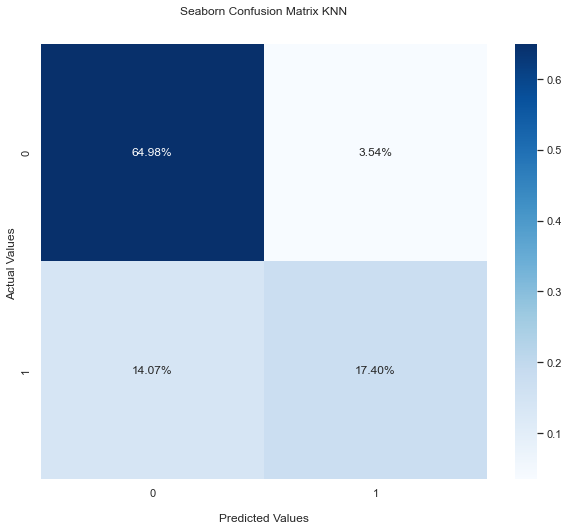

In [60]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix KNN\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

In [61]:
error_rate= []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))    

Text(0, 0.5, 'Error Rate')

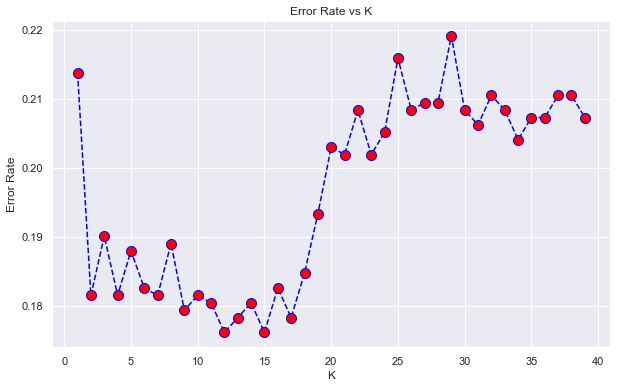

In [62]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color = 'blue',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Prediction of Employee LeavingOrNot using DecisionTreeClassifier

In [63]:
model_dtc=DecisionTreeClassifier()
parameters = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
model_dtc_grid = GridSearchCV(model_dtc, parameters,cv=10,verbose=1,n_jobs=-1).fit(X_train,y_train)
print(model_dtc_grid.best_params_)

print('Decision Tree Classifier score:',model_dtc_grid.best_score_)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
{'criterion': 'entropy', 'max_depth': 8}
Decision Tree Classifier score: 0.8492829138920118


In [64]:
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=8, random_state = 2)

In [65]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2)

In [66]:
dtc.score(X_train, y_train)

0.8645889306824288

In [67]:
y_pred = dtc.predict(X_test)

In [68]:
test_model(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       638
           1       0.83      0.71      0.76       293

    accuracy                           0.86       931
   macro avg       0.85      0.82      0.83       931
weighted avg       0.86      0.86      0.86       931


Accuracy score:  0.8625134264232008
Precision score:  0.8313253012048193


In [69]:
cf_matrix = confusion_matrix(y_test,y_pred)
print(cf_matrix)

[[596  42]
 [ 86 207]]


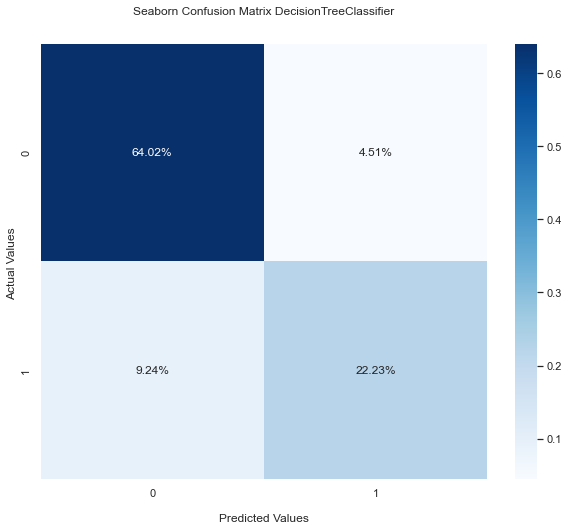

In [70]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix DecisionTreeClassifier\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Prediction of Employee LeavingOrNot using LogisticRegression

In [71]:
model_le=LogisticRegression(random_state=2)
model_le.fit(X_train,y_train)
parameters = {'C':[0.8,0.9,1,1.1,1.2]}
model_le_grid = GridSearchCV(model_le, parameters,cv=10,verbose=1,n_jobs=-1).fit(X_train,y_train)
print(model_le_grid.best_params_)

print('Logistic Regression Train score:',model_le.score(X_train,y_train))
print('Logistic Regression score:',model_le_grid.best_score_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
{'C': 0.8}
Logistic Regression Train score: 0.7256851155292854
Logistic Regression score: 0.7232739485139381


In [72]:
lrc = LogisticRegression(random_state = 2, C=0.8)

In [73]:
lrc.fit(X_train,y_train)

LogisticRegression(C=0.8, random_state=2)

In [74]:
lrc.score(X_train, y_train)

0.7259537882858678

In [75]:
y_pred = lrc.predict(X_test)

In [76]:
test_model(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       638
           1       0.67      0.43      0.52       293

    accuracy                           0.75       931
   macro avg       0.72      0.66      0.68       931
weighted avg       0.74      0.75      0.74       931


Accuracy score:  0.7529538131041891
Precision score:  0.6684491978609626


In [77]:
cf_matrix = confusion_matrix(y_test,y_pred)
print(cf_matrix)

[[576  62]
 [168 125]]


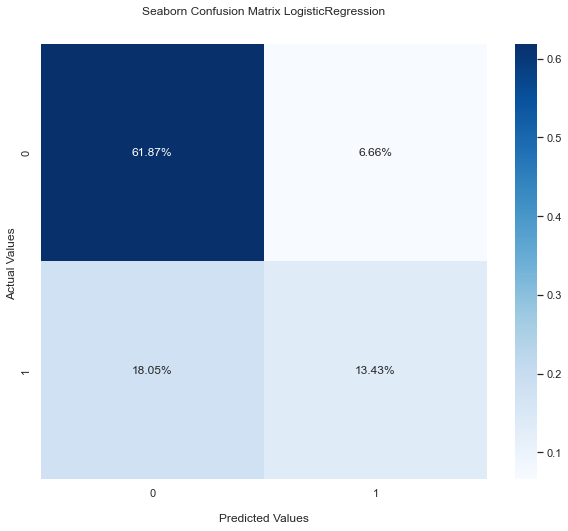

In [78]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix LogisticRegression\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Prediction of Employee LeavingOrNot using RandomForestClassifier

In [79]:
model_rfc=RandomForestClassifier(n_jobs=-1)
parameters = {'n_estimators':[50,100,200,300,400],'max_depth':[3,4,5,6]}
model_rfc_grid = GridSearchCV(model_rfc, parameters,cv=10,verbose=1,n_jobs=-1).fit(X_train,y_train)
print(model_rfc_grid.best_params_)

print('Random Forest Classifier score:',model_rfc_grid.best_score_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
{'max_depth': 6, 'n_estimators': 300}
Random Forest Classifier score: 0.8449854420709736


In [80]:
rfc = RandomForestClassifier(n_estimators=400, random_state=2,max_depth=6)

In [81]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, n_estimators=400, random_state=2)

In [82]:
rfc.score(X_train,y_train)

0.8514239656098872

In [83]:
y_pred = rfc.predict(X_test)

In [84]:
test_model(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.84      0.98      0.90       638
           1       0.93      0.60      0.73       293

    accuracy                           0.86       931
   macro avg       0.88      0.79      0.82       931
weighted avg       0.87      0.86      0.85       931


Accuracy score:  0.8582169709989259
Precision score:  0.9259259259259259


In [85]:
cf_matrix = confusion_matrix(y_test,y_pred)
print(cf_matrix)

[[624  14]
 [118 175]]


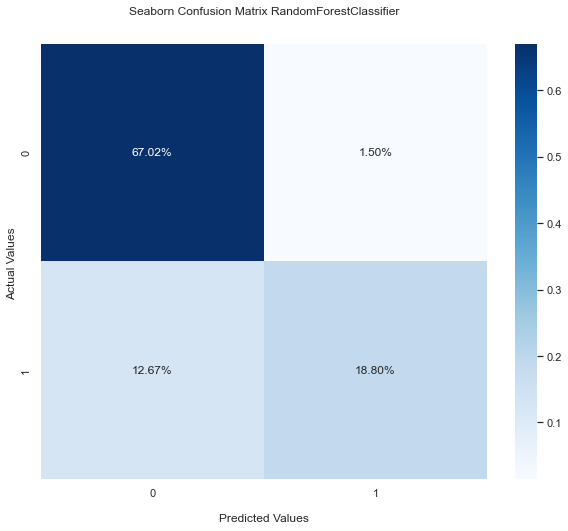

In [86]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix RandomForestClassifier\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Prediction of Employee LeavingOrNot using AdaBoostClassifier

In [87]:
model_abc=AdaBoostClassifier()
parameters = {'n_estimators' : [50, 70, 90, 120, 180, 200, 500, 1000],'learning_rate' : [0.001, 0.01, 0.05, 0.5, 0.1, 1, 10]}
model_abc_grid = GridSearchCV(model_abc, parameters, n_jobs = -1, cv = 10, verbose = 1).fit(X_train,y_train)
print(model_abc_grid.best_params_)

print('Ada Boost Classifier score:',model_abc_grid.best_score_)

Fitting 10 folds for each of 56 candidates, totalling 560 fits
{'learning_rate': 1, 'n_estimators': 180}
Ada Boost Classifier score: 0.7952758799619476


In [88]:
abc = AdaBoostClassifier(learning_rate= 1, n_estimators= 180, random_state=2)

In [89]:
abc.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=180, random_state=2)

In [90]:
abc.score(X_train, y_train)

0.7982267598065557

In [91]:
y_pred = abc.predict(X_test)

In [92]:
test_model(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.82      0.94      0.87       638
           1       0.80      0.55      0.65       293

    accuracy                           0.81       931
   macro avg       0.81      0.74      0.76       931
weighted avg       0.81      0.81      0.80       931


Accuracy score:  0.8131041890440387
Precision score:  0.7960199004975125


In [93]:
cf_matrix = confusion_matrix(y_test,y_pred)
print(cf_matrix)

[[597  41]
 [133 160]]


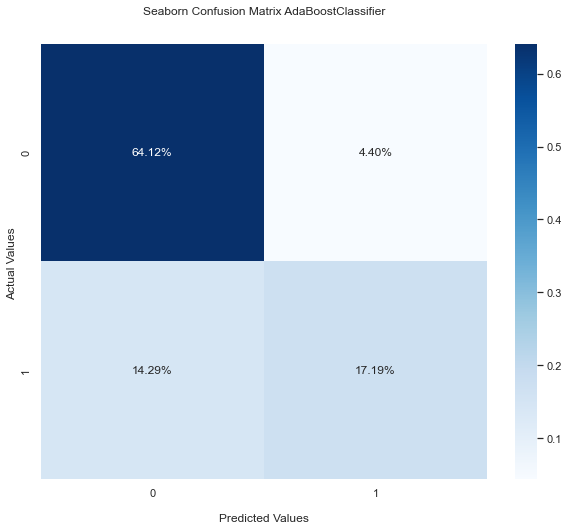

In [94]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix AdaBoostClassifier\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Prediction of Employee LeavingOrNot using BaggingClassifier

In [95]:
model_bc=BaggingClassifier()
parameters = {'n_estimators': [2, 5, 10, 15, 20, 50, 100] ,'max_features': [0.5, 0.7, 1.0],'max_samples': [0.5, 0.7, 1.0]}
model_bc_grid = GridSearchCV(model_bc, parameters, n_jobs = -1, cv = 10, verbose = 1).fit(X_train,y_train)
print(model_bc_grid.best_params_)

print('Bagging Classifier score:',model_bc_grid.best_score_)

Fitting 10 folds for each of 63 candidates, totalling 630 fits
{'max_features': 0.7, 'max_samples': 0.7, 'n_estimators': 100}
Bagging Classifier score: 0.8369266914583875


In [96]:
bc = BaggingClassifier(max_features= 0.7, max_samples= 0.5, n_estimators= 100, random_state=2)

In [97]:
bc.fit(X_train,y_train)

BaggingClassifier(max_features=0.7, max_samples=0.5, n_estimators=100,
                  random_state=2)

In [98]:
bc.score(X_train, y_train)

0.884739387426115

In [99]:
y_pred = bc.predict(X_test)

In [100]:
test_model(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       638
           1       0.92      0.63      0.75       293

    accuracy                           0.87       931
   macro avg       0.88      0.80      0.83       931
weighted avg       0.87      0.87      0.86       931


Accuracy score:  0.8668098818474759
Precision score:  0.916256157635468


In [101]:
cf_matrix = confusion_matrix(y_test,y_pred)
print(cf_matrix)

[[621  17]
 [107 186]]


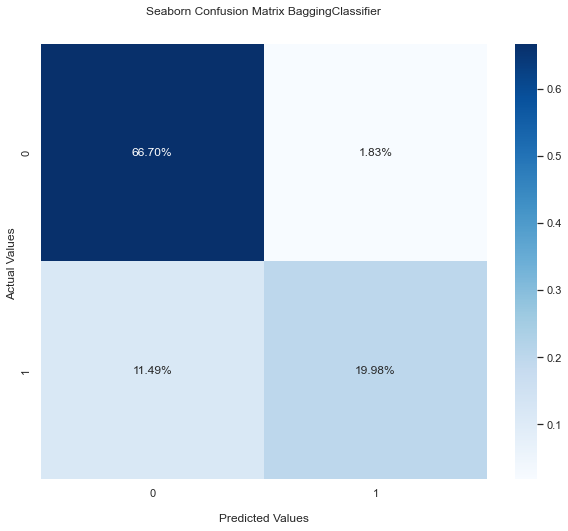

In [102]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix BaggingClassifier\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Prediction of Employee LeavingOrNot using SupportVectorClassifier

In [103]:
model_svc=SVC(random_state=2)
parameters = {'kernel':('linear', 'rbf','poly'), 'C':[0.8,0.9,1,1.1,1.2],'degree':[3,4,5,6]}
model_svc_grid = GridSearchCV(model_svc, parameters,cv=10,verbose=1,n_jobs=-1).fit(X_train,y_train)
print(model_svc_grid.best_params_)


print('Support Vecktor Classification score:',model_svc_grid.best_score_)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
{'C': 1.2, 'degree': 3, 'kernel': 'rbf'}
Support Vecktor Classification score: 0.8280622099224537


In [104]:
svc = SVC(random_state=2,C=1.2,degree=3,kernel='rbf')

In [105]:
svc.fit(X_train,y_train)

SVC(C=1.2, random_state=2)

In [106]:
svc.score(X_train,y_train)

0.8527673293927995

In [107]:
y_pred = svc.predict(X_test)

In [108]:
test_model(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       638
           1       0.86      0.65      0.74       293

    accuracy                           0.85       931
   macro avg       0.86      0.80      0.82       931
weighted avg       0.86      0.85      0.85       931


Accuracy score:  0.8549946294307197
Precision score:  0.8590909090909091


In [109]:
cf_matrix = confusion_matrix(y_test,y_pred)
print(cf_matrix)

[[607  31]
 [104 189]]


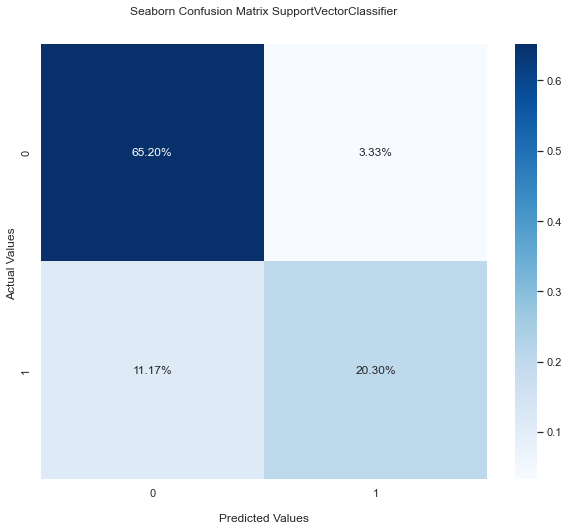

In [110]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix SupportVectorClassifier\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Accuracy and Precision comparison

In [111]:
models = {
    'K-nearest neighbors' : knn, 
    'DecisionTreeClassifier': dtc, 
    'LogisticRegression': lrc, 
    'RandomForestClassifier': rfc, 
    'AdaBoostClassifier': abc, 
    'BaggingClassifier': bc, 
    'SupportVectorClassifier': svc
}

accuracy_scores = []
precision_scores = []

for name,model in models.items():
    
    current_accuracy,current_precision = train_model(model, X_train,y_train,X_test,y_test)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    

performance_df = pd.DataFrame({'Algorithm':models.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
5,BaggingClassifier,0.866810,0.916256
1,DecisionTreeClassifier,0.862513,0.831325
3,RandomForestClassifier,0.858217,0.925926
6,SupportVectorClassifier,0.854995,0.859091
4,AdaBoostClassifier,0.813104,0.796020
0,K-nearest neighbors,0.792696,0.801205
2,LogisticRegression,0.752954,0.668449


In [112]:
feature = pd.Series(dtc.feature_importances_, index = X_train.columns).sort_values(ascending = False)
print(feature)

JoiningYear                  0.296850
PaymentTier                  0.194894
City_Pune                    0.141158
Education                    0.132925
Gender_Male                  0.089467
Age                          0.062629
ExperienceInCurrentDomain    0.047344
EverBenched_Yes              0.019334
City_New Delhi               0.015399
dtype: float64


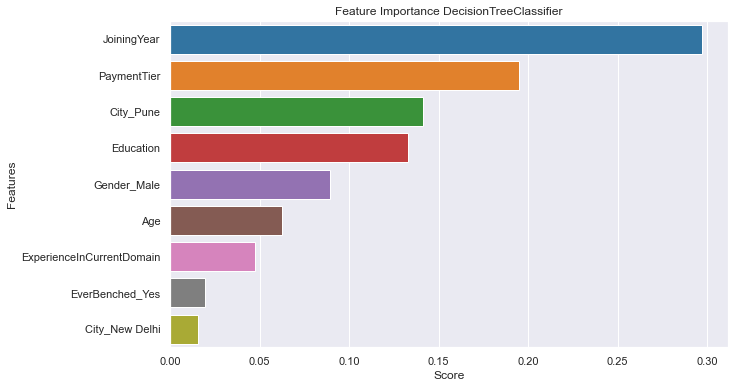

In [113]:
plt.figure(figsize = (10,6))
sns.barplot(x = feature, y = feature.index)
plt.title("Feature Importance DecisionTreeClassifier")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()

In [114]:
feature = pd.Series(rfc.feature_importances_, index = X_train.columns).sort_values(ascending = False)
print(feature)

JoiningYear                  0.400260
PaymentTier                  0.141636
City_Pune                    0.130985
Education                    0.118780
Gender_Male                  0.117833
Age                          0.037057
ExperienceInCurrentDomain    0.020857
City_New Delhi               0.020274
EverBenched_Yes              0.012318
dtype: float64


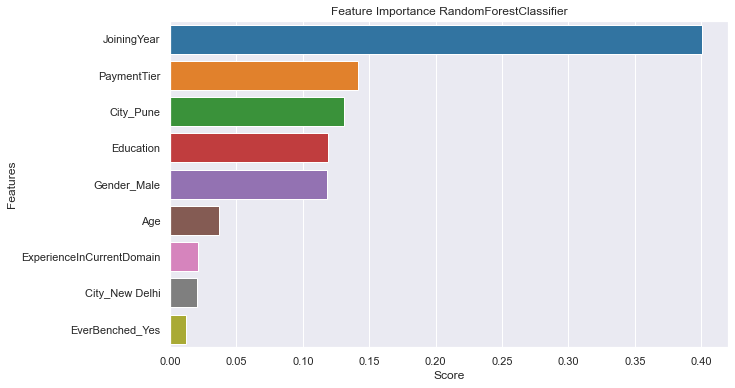

In [115]:
plt.figure(figsize = (10,6))
sns.barplot(x = feature, y = feature.index)
plt.title("Feature Importance RandomForestClassifier")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()

In [116]:
feature = pd.Series(abc.feature_importances_, index = X_train.columns).sort_values(ascending = False)
print(feature)

Age                          0.433333
ExperienceInCurrentDomain    0.277778
JoiningYear                  0.144444
Education                    0.050000
PaymentTier                  0.027778
City_Pune                    0.027778
City_New Delhi               0.022222
Gender_Male                  0.011111
EverBenched_Yes              0.005556
dtype: float64


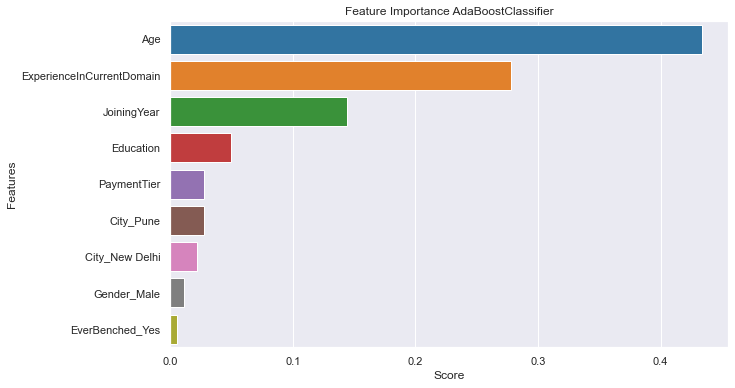

In [117]:
plt.figure(figsize = (10,6))
sns.barplot(x = feature, y = feature.index)
plt.title("Feature Importance AdaBoostClassifier")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()